## DATAHUT
# Smartwatch Brands: Flipkart data analysis and Visualization
ARCHANA NARAYANAN


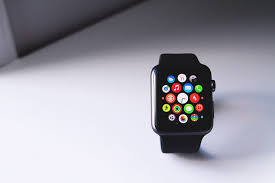

In [23]:
from PIL import Image
import requests
from io import BytesIO
#img = img.resize((1000,1000),Image.ANTIALIAS)
response = requests.get('https://cutewallpaper.org/22/smartwatch-wallpapers/2031110222.jpg')
img = Image.open(BytesIO(response.content))
img

### Import libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [25]:
df=pd.read_csv('smartwatch_data2.csv')

In [26]:
df.head(3)

,Product_url,Product_name,Brand,Sale_price,MRP,Discount_percentage,Memory,No_of_ratings,No_of_reviews,Star_rating,Description
0,https://www.flipkart.com/apple-watch-series-3-...,"APPLE Watch Series 3 (GPS, 42mm) - Space Grey ...",APPLE,23349,23900,2,8,55019,4837,4.6,"Check your heart rate, and get notifications f..."
1,https://www.flipkart.com/apple-watch-series-8-...,APPLE Watch Series 8 GPS,APPLE,48900,48900,0,32,67,5,4.3,"{'Sales Package': 'Smartwatch, Strap, 1m Magne..."
2,https://www.flipkart.com/apple-watch-se-gps-ce...,"APPLE Watch SE (GPS+Cellular, 44mm) Space Grey...",APPLE,36900,36900,0,32,3278,245,4.6,With powerful features to help keep you connec...


In [27]:
df.Brand.unique()

array(['APPLE', 'Noise', 'boAt', 'Honor', 'SAMSUNG', 'FITBIT', 'Amazfit',
       'GARMIN', 'Huawei', 'FOSSIL'], dtype=object)

In [28]:
df.Brand.value_counts()


APPLE      272
GARMIN     176
Noise      144
FOSSIL     110
boAt        64
SAMSUNG     59
FITBIT      51
Amazfit     47
Huawei      21
Honor       13
Name: Brand, dtype: int64

In [29]:
len(df.Product_name.unique())

378

In [30]:
df.shape

(957, 11)

In [31]:
df[df.duplicated()].shape


(57, 11)

In [32]:
df=df.drop_duplicates()

### Checking for null values

In [33]:
df.isnull().sum()

Product_url            0
Product_name           0
Brand                  0
Sale_price             0
MRP                    0
Discount_percentage    0
Memory                 0
No_of_ratings          0
No_of_reviews          0
Star_rating            0
Description            0
dtype: int64

In [34]:
df['Sale_price'].unique()

array(['23349', '48900', '36900', '44544', '41900', 'No price available',
       '58900', '33900', '29606', '32900', '44648', '22900', '45900',
       '20900', '29900', '44900', '50900', '53900', '74900', '55900',
       '77900', '49900', '40900', '73900', '79900', '37900', '69900',
       '52900', '43900', '34900', '84900', '89900', '65900', '49899',
       '22990', '56900', '60900', '24900', '31600', '33500', '39120',
       '41120', '39080', '41160', '23900', '83900', '42999', '64900',
       '21900', '34410', '31900', '25900', '32380', '41180', '50400',
       '1999', '2199', '1699', '1899', '1499', '2999', '1799', '3499',
       '4999', '4451', '4499', '2699', '2799', '3999', '3969', '5999',
       '4061', '3324', '6055', '2499', '3017', '2849', '2749', '2772',
       '1659', '1859', '5499', '2899', '4299', '2299', '2339', '2955',
       '11999', '16999', '14999', '13999', '10999', '9047', '7999',
       '17999', '11177', '44999', '11700', '18000', '16990', '32999',
       '35999'

In [35]:
df[df['Sale_price']=='No price available']

,Product_url,Product_name,Brand,Sale_price,MRP,Discount_percentage,Memory,No_of_ratings,No_of_reviews,Star_rating,Description
6,https://www.flipkart.com/apple-watch-series7-g...,"APPLE Watch Series7 (GPS + Cellular, 45mm)Blue...",APPLE,No price available,No price available,0,32,1370,106,4.5,"The largest, most advanced Always-on Retina di..."
15,https://www.flipkart.com/apple-watch-series-8-...,APPLE Watch Series 8 GPS + Cellular,APPLE,No price available,No price available,0,32,75,3,4.5,"{'Sales Package': 'Smartwatch, Strap, 1m Magne..."
201,https://www.flipkart.com/apple-watch-series-3-...,APPLE Watch Series 3 GPS + Cellular -,APPLE,No price available,No price available,0,16,880,105,4.5,"{'Sales Package': 'Smartwatch, 1m Magnetic Cha..."
766,https://www.flipkart.com/garmin-instinct-tacti...,"GARMIN Instinct Tactical Rugged Outdoor Watch,...",GARMIN,No price available,No price available,0,Memory data not available,21,1,4.7,"When you can rely on Instinct, the world can r..."


In [36]:
df[df['MRP']=='No price available']

,Product_url,Product_name,Brand,Sale_price,MRP,Discount_percentage,Memory,No_of_ratings,No_of_reviews,Star_rating,Description
6,https://www.flipkart.com/apple-watch-series7-g...,"APPLE Watch Series7 (GPS + Cellular, 45mm)Blue...",APPLE,No price available,No price available,0,32,1370,106,4.5,"The largest, most advanced Always-on Retina di..."
15,https://www.flipkart.com/apple-watch-series-8-...,APPLE Watch Series 8 GPS + Cellular,APPLE,No price available,No price available,0,32,75,3,4.5,"{'Sales Package': 'Smartwatch, Strap, 1m Magne..."
201,https://www.flipkart.com/apple-watch-series-3-...,APPLE Watch Series 3 GPS + Cellular -,APPLE,No price available,No price available,0,16,880,105,4.5,"{'Sales Package': 'Smartwatch, 1m Magnetic Cha..."
766,https://www.flipkart.com/garmin-instinct-tacti...,"GARMIN Instinct Tactical Rugged Outdoor Watch,...",GARMIN,No price available,No price available,0,Memory data not available,21,1,4.7,"When you can rely on Instinct, the world can r..."


In [37]:
df.drop(df.loc[df.Sale_price=='No price available'].index,inplace=True)

In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 956
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_url          896 non-null    object 
 1   Product_name         896 non-null    object 
 2   Brand                896 non-null    object 
 3   Sale_price           896 non-null    object 
 4   MRP                  896 non-null    object 
 5   Discount_percentage  896 non-null    int64  
 6   Memory               896 non-null    object 
 7   No_of_ratings        896 non-null    object 
 8   No_of_reviews        896 non-null    int64  
 9   Star_rating          896 non-null    float64
 10  Description          896 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 84.0+ KB


In [39]:
df['Discount_percentage'].unique()

array([ 2,  0,  4,  9, 33, 28, 24, 60, 56, 57, 52, 70, 50, 64, 41, 37, 63,
       25, 55, 61, 53, 32, 44, 66, 58, 49, 43, 45, 69, 21, 30, 72, 74, 59,
       62, 67, 71, 20, 10, 12, 54, 11, 14,  8, 39,  6, 36, 13,  7,  5, 47,
       42, 34,  3, 19, 16, 17, 15, 35, 38, 27,  1, 29, 26, 46, 48, 51, 23,
       18, 22, 31, 40])

In [40]:
df['Sale_price']=df['Sale_price'].str.replace(',','')
df['Sale_price']=df['Sale_price'].astype(float)

In [41]:
df['MRP']=df['MRP'].str.replace(',','')
df['MRP']=df['MRP'].astype(float)

In [42]:
df['No_of_reviews']=df['No_of_reviews'].replace(',','')
df['No_of_ratings']=df['No_of_ratings'].str.replace(',','')
df['No_of_ratings']=df['No_of_ratings'].astype(float)
df['No_of_reviews']=df['No_of_reviews'].astype(float)

In [43]:
df['Sale_price']=df['Sale_price'].astype(float)

df['Discount_percentage']=df['Discount_percentage'].astype(float)

df['Memory']=df['Memory'].replace(['Memory data not available'],'0')
df['Memory']=df['Memory'].astype(float)

In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 956
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_url          896 non-null    object 
 1   Product_name         896 non-null    object 
 2   Brand                896 non-null    object 
 3   Sale_price           896 non-null    float64
 4   MRP                  896 non-null    float64
 5   Discount_percentage  896 non-null    float64
 6   Memory               896 non-null    float64
 7   No_of_ratings        896 non-null    float64
 8   No_of_reviews        896 non-null    float64
 9   Star_rating          896 non-null    float64
 10  Description          896 non-null    object 
dtypes: float64(7), object(4)
memory usage: 84.0+ KB


In [45]:
df.shape

(896, 11)

In [46]:
df.nunique()

Product_url            896
Product_name           377
Brand                   10
Sale_price             266
MRP                    186
Discount_percentage     72
Memory                   6
No_of_ratings          177
No_of_reviews          120
Star_rating             24
Description            788
dtype: int64

## Analysing dataset

In [83]:
df.describe()

,Sale_price,MRP,Discount_percentage,Memory,No_of_ratings,No_of_reviews,Star_rating,Counts
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,28450.223214,31667.988839,18.664062,8.170759,12315.143973,1155.973214,3.540402,5.354911
std,23482.328127,23125.432317,21.937949,12.916356,64203.348597,5824.859952,1.634597,5.623488
min,1499.000000,3999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9999.000000,14995.000000,0.000000,0.000000,17.000000,1.000000,3.900000,2.000000
50%,21945.000000,25990.000000,9.000000,0.000000,274.000000,26.000000,4.200000,3.000000
75%,40900.000000,42990.000000,34.000000,16.000000,2303.500000,228.000000,4.500000,6.000000
max,129990.000000,139990.000000,74.000000,32.000000,607488.000000,54226.000000,5.000000,24.000000


In [84]:
df[df['Sale_price']==1499.000000]

,Product_url,Product_name,Brand,Sale_price,MRP,Discount_percentage,Memory,No_of_ratings,No_of_reviews,Star_rating,Description,Counts
276,https://www.flipkart.com/noise-colorfit-qube-s...,"Noise ColorFit Qube Spo2, 1.4"" Full Touch disp...",Noise,1499.0,4999.0,70.0,0.0,77085.0,6488.0,4.1,"{'Sales Package': 'Smartwatch, Charging Cable,...",4
336,https://www.flipkart.com/noise-colorfit-qube-s...,"Noise ColorFit Qube Spo2, 1.4"" Full Touch disp...",Noise,1499.0,4999.0,70.0,0.0,51038.0,3951.0,4.2,"{'Sales Package': 'Smartwatch, Charging Cable,...",4
424,https://www.flipkart.com/boat-wave-beat-1-69in...,boAt Wave beat 1.69Inch HD display with comple...,boAt,1499.0,5990.0,74.0,0.0,17788.0,1337.0,4.1,The boAt Wave Beat is the perfect companion fo...,4
451,https://www.flipkart.com/boat-wave-beat-1-69in...,boAt Wave beat 1.69Inch HD display with comple...,boAt,1499.0,5990.0,74.0,0.0,17788.0,1337.0,4.1,The boAt Wave Beat is the perfect companion fo...,4
452,https://www.flipkart.com/boat-wave-beat-1-69in...,boAt Wave beat 1.69Inch HD display with comple...,boAt,1499.0,5990.0,74.0,0.0,17788.0,1337.0,4.1,The boAt Wave Beat is the perfect companion fo...,4
453,https://www.flipkart.com/boat-wave-beat-1-69in...,boAt Wave beat 1.69Inch HD display with comple...,boAt,1499.0,5990.0,74.0,0.0,17788.0,1337.0,4.1,The boAt Wave Beat is the perfect companion fo...,4


In [85]:
df[df['Sale_price']==129990.000000]

,Product_url,Product_name,Brand,Sale_price,MRP,Discount_percentage,Memory,No_of_ratings,No_of_reviews,Star_rating,Description,Counts
673,https://www.flipkart.com/garmin-fenix-7x-sapph...,"GARMIN Fenix 7X Sapphire Solar, Up to 28 days/...",GARMIN,129990.0,139990.0,7.0,0.0,0.0,0.0,0.0,"{'Sales Package': 'Fenix 7X Solar, Charging/da...",3


### Product Range

In [47]:
df['Brand'].groupby(df['Brand']).count().sort_values(ascending=False)


Brand
APPLE      266
GARMIN     171
FOSSIL     108
Noise       96
boAt        64
SAMSUNG     59
FITBIT      51
Amazfit     47
Huawei      21
Honor       13
Name: Brand, dtype: int64

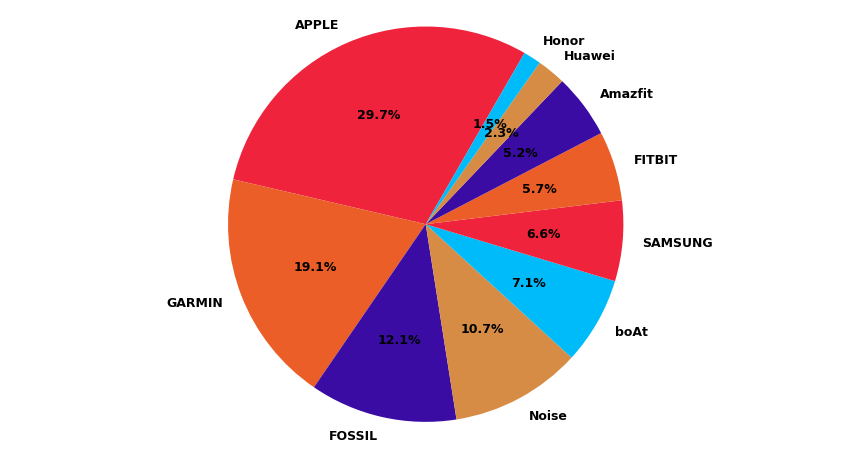

In [48]:
labels = 'APPLE','GARMIN','FOSSIL','Noise' ,'boAt','SAMSUNG','FITBIT','Amazfit','Huawei','Honor' 
sizes = [266, 171, 108, 96, 64, 59, 51, 47, 21, 13]
fig, ax = plt.subplots(figsize=(15,8))
fig.set_facecolor('white')
ax.pie(sizes, labels=labels, colors=["#EF233C","#eb5e28","#3a0ca3","#d68c45","#00bbf9"],autopct='%1.1f%%', startangle=60,textprops={'color':'black','weight':'bold','fontsize':12.5})
ax.axis('equal')
plt.show()

[Text(0, 0, '266'),
 Text(0, 0, '171'),
 Text(0, 0, '108'),
 Text(0, 0, '96'),
 Text(0, 0, '64'),
 Text(0, 0, '59'),
 Text(0, 0, '51'),
 Text(0, 0, '47'),
 Text(0, 0, '21'),
 Text(0, 0, '13')]

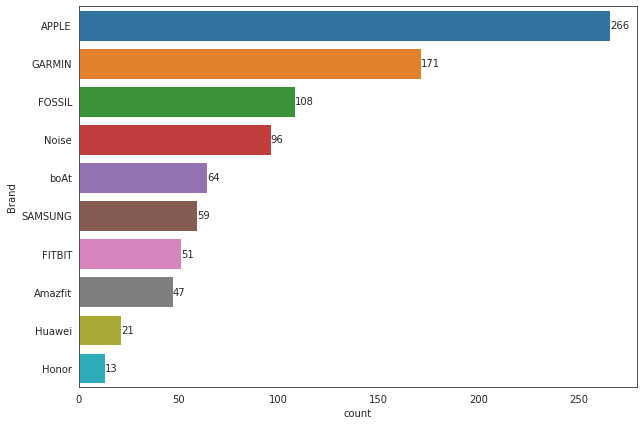

In [49]:
sns.set_style('white')
plt.figure(figsize=(10,7))
s=sns.countplot(y="Brand",data=df,order=df["Brand"].value_counts().iloc[:].index)
s.bar_label(s.containers[0])

#### Watches with rating greater than 3

[Text(0, 0, '261'),
 Text(0, 0, '77'),
 Text(0, 0, '100'),
 Text(0, 0, '82'),
 Text(0, 0, '61'),
 Text(0, 0, '56'),
 Text(0, 0, '33'),
 Text(0, 0, '37'),
 Text(0, 0, '20'),
 Text(0, 0, '13')]

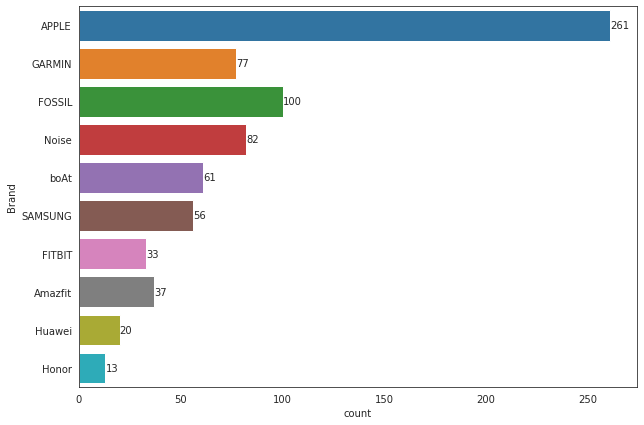

In [50]:
n_df=df[df['Star_rating']>=3]
sns.set_style('white')
plt.figure(figsize=(10,7))
s=sns.countplot(y="Brand",data=n_df,order=df["Brand"].value_counts().iloc[:].index)
s.bar_label(s.containers[0])

### sunburst chart

In [51]:
#Adding new column count which is the product count

df['Counts'] = df.groupby(['Product_name'])['Product_name'].transform('count')


In [61]:
#creating a new dataframe

sun_df=df[['Brand','Product_name','Counts']].drop_duplicates()
sun_df['watch']='SmartWatch'


In [60]:
fig=px.sunburst(sun_df,
               path=['watch','Brand','Product_name'],
               values='Counts',
               title='Top Smart watch brands',
               width=750, height=750)


fig.show()

In [52]:
#creating seperate dataframe for each top 6 brands top 5 product and merging to a single dataframe

x=df[['Brand','Product_name','Counts']]
a1=x[x['Brand']=='APPLE'].sort_values(by='Counts',ascending=False).drop_duplicates().head(5)
a2=x[x['Brand']=='Honor'].sort_values(by='Counts',ascending=False).drop_duplicates().head(5)
a3=x[x['Brand']=='SAMSUNG'].sort_values(by='Counts',ascending=False).drop_duplicates().head(5)
a4=x[x['Brand']=='Huawei'].sort_values(by='Counts',ascending=False).drop_duplicates().head(5)
a5=x[x['Brand']=='FOSSIL'].sort_values(by='Counts',ascending=False).drop_duplicates().head(5)
a6=x[x['Brand']=='boAt'].sort_values(by='Counts',ascending=False).drop_duplicates().head(5)




In [64]:
frames = [a1,a2,a3,a4,a5,a6]
result = pd.concat(frames)
result


,Brand,Product_name,Counts
135,APPLE,APPLE Watch Series 6 GPS + Cellular,24
126,APPLE,APPLE Watch Series 5 GPS + Cellular,18
151,APPLE,APPLE Watch SE GPS + Cellular,18
113,APPLE,APPLE Watch Series 8 GPS + Cellular,18
156,APPLE,APPLE Watch Ultra GPS + Cellular,18
481,Honor,Honor Watch GS 3 Smartwatch,3
485,Honor,Honor Watch ES Smartwatch,2
487,Honor,Honor Magic Watch 2 (42 mm) Smartwatch,2
491,Honor,Honor Watch GS Pro Smartwatch,2
480,Honor,Honor Magic Watch 2 (46mm) Smartwatch,1


In [65]:
result['watch']='SmartWatch'

fig=px.sunburst(result,
               path=['watch','Brand','Product_name'],
               values='Counts',
               title='Top Smart watch brands',
               width=750, height=750)


fig.show()




### Average rating

In [54]:
#creating a new dataframe of average rating of each product 

n_df=round(df.groupby('Product_name')['Star_rating'].mean().reset_index(),1)
n_df.head(5)

,Product_name,Star_rating
0,APPLE Apple Watch SE,4.6
1,APPLE Watch,4.4
2,APPLE Watch 2 -,4.6
3,APPLE Watch Nike Series 5 GPS,3.5
4,APPLE Watch Nike Series 5 GPS + Cellular,3.0


In [55]:
result['Star_Rating']=np.nan
for i in range(len(n_df)):
    for j in range(len(result)):
        if n_df['Product_name'].iloc[i]==result['Product_name'].iloc[j]:
            result['Star_Rating'].iloc[j]=n_df['Star_rating'].iloc[i]
            

/tmp/ipykernel_3724/3802106113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Star_Rating'].iloc[j]=n_df['Star_rating'].iloc[i]


In [56]:
result

,Brand,Product_name,Counts,Star_Rating
135,APPLE,APPLE Watch Series 6 GPS + Cellular,24,4.2
126,APPLE,APPLE Watch Series 5 GPS + Cellular,18,4.2
151,APPLE,APPLE Watch SE GPS + Cellular,18,4.6
113,APPLE,APPLE Watch Series 8 GPS + Cellular,18,4.5
156,APPLE,APPLE Watch Ultra GPS + Cellular,18,4.8
481,Honor,Honor Watch GS 3 Smartwatch,3,4.3
485,Honor,Honor Watch ES Smartwatch,2,4.3
487,Honor,Honor Magic Watch 2 (42 mm) Smartwatch,2,4.4
491,Honor,Honor Watch GS Pro Smartwatch,2,4.4
480,Honor,Honor Magic Watch 2 (46mm) Smartwatch,1,4.4


In [29]:
df1=round(df.groupby('Brand')['Star_rating'].mean().reset_index().sort_values(by='Star_rating',ascending=False),1)
df1

,Brand,Star_rating
0,APPLE,4.5
5,Honor,4.3
8,SAMSUNG,4.1
6,Huawei,3.9
3,FOSSIL,3.8
9,boAt,3.8
7,Noise,3.5
1,Amazfit,3.3
2,FITBIT,2.7
4,GARMIN,1.9


[Text(0, 0, '4.5'),
 Text(0, 0, '4.3'),
 Text(0, 0, '4.1'),
 Text(0, 0, '3.9'),
 Text(0, 0, '3.8'),
 Text(0, 0, '3.8'),
 Text(0, 0, '3.5'),
 Text(0, 0, '3.3'),
 Text(0, 0, '2.7'),
 Text(0, 0, '1.9')]

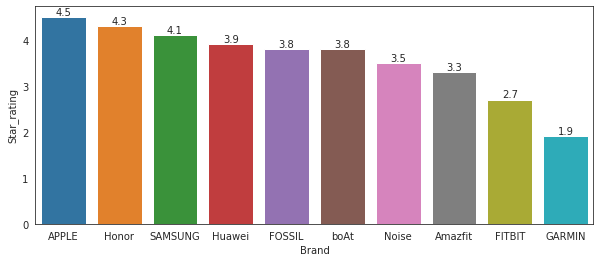

In [30]:
plt.figure(figsize=(10,4))
s=sns.barplot(x=df1.Brand,y=df1.Star_rating)
s.bar_label(s.containers[0])


([<matplotlib.patches.Wedge at 0x7f026f60a7a0>,
 [Text(1.0160711609853594, 0.42142543327837273, 'APPLE'),
  Text(0.5239512231472594, 0.9671996256008845, 'Amazfit'),
  Text(-0.03346531975292389, 1.0994908241426278, 'FITBIT'),
  Text(-0.6220820900793239, 0.9072011205915369, 'FOSSIL'),
  Text(-0.9801665407338654, 0.4992730239316039, 'GARMIN'),
  Text(-1.0966991650148075, -0.08515246006912594, 'Honor'),
  Text(-0.7622837804227356, -0.7930469331032197, 'Huawei'),
  Text(-0.12312847398062185, -1.0930870866016136, 'Noise'),
  Text(0.5763463645977983, -0.9369230854317241, 'SAMSUNG'),
  Text(1.0400766682924547, -0.3581068612490791, 'boAt')],
 [Text(0.5542206332647414, 0.22986841815183962, '12.5%'),
  Text(0.2857915762621414, 0.5275634321459369, '9.2%'),
  Text(-0.01825381077432212, 0.5997222677141605, '7.6%'),
  Text(-0.33931750367963115, 0.49483697486811096, '10.6%'),
  Text(-0.5346362949457447, 0.27233074032632937, '5.3%'),
  Text(-0.5981995445535313, -0.04644679640134142, '12.2%'),
  Text(-0

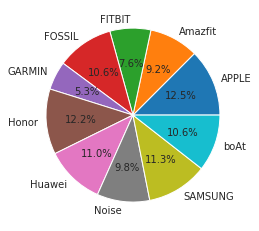

In [61]:
plt.pie(df.groupby('Brand')['Star_rating'].mean(),autopct='%1.1f%%',labels=df.groupby('Brand')['Star_rating'].mean().reset_index()['Brand'])


### Discount_percentage

[Text(0, 0, '60.3'),
 Text(0, 0, '46.1'),
 Text(0, 0, '32.6'),
 Text(0, 0, '27.5'),
 Text(0, 0, '26.4'),
 Text(0, 0, '19'),
 Text(0, 0, '16.1'),
 Text(0, 0, '15.1'),
 Text(0, 0, '10.7'),
 Text(0, 0, '0.5')]

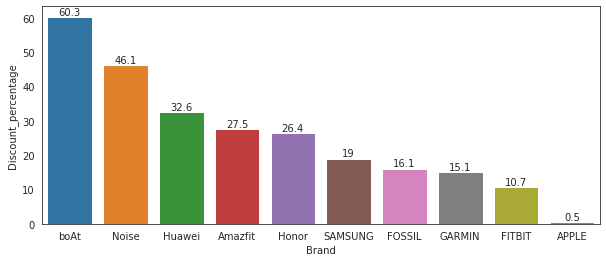

In [31]:
df2=round(df.groupby('Brand')['Discount_percentage'].mean().reset_index().sort_values(by='Discount_percentage',ascending=False),1)
plt.figure(figsize=(10,4))
s=sns.barplot(x=df2.Brand,y=df2.Discount_percentage)
s.bar_label(s.containers[0])


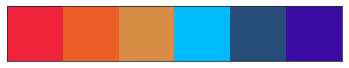

In [68]:
#color palette for this notebook
colors = ["#EF233C","#eb5e28","#d68c45","#00bbf9","#274c77","#3a0ca3"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size =1)
plt.show()

### Analyzing the relation between sales price and star rating

/tmp/ipykernel_3724/856391397.py:14: UserWarning:

The palette list has more values (6) than needed (4), which may not be intended.



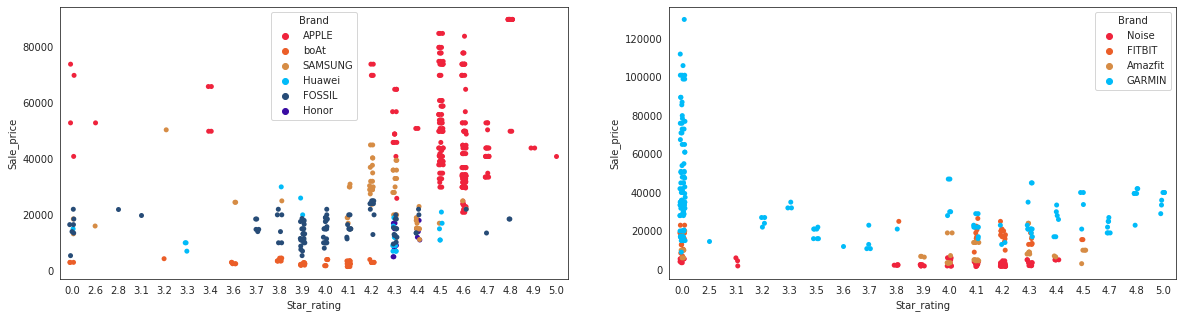

In [69]:
#list of top six brands
list1 = ['APPLE', 'Honor', 'SAMSUNG', 'Huawei', 'FOSSIL', 'boAt']

#list of other brnads
list2 = ['Noise', 'FITBIT', 'Amazfit','GARMIN']

series1 = df["Brand"].isin(list1)
series2 = df["Brand"].isin(list2)

df_f1= df[series1]
df_f2= df[series2]
fig, axs = plt.subplots(ncols=2,figsize=(20,5))
ax1 = sns.stripplot(x="Star_rating", y="Sale_price", data=df_f1,hue="Brand", palette=colors,ax=axs[0])
ax2 = sns.stripplot(x="Star_rating", y="Sale_price", data=df_f2,hue="Brand", palette=colors,ax=axs[1])

###  Analyzing the relation between sales price and MRP

In [71]:
import altair as alt
alt.Chart(df).mark_point(filled=True,size=40).encode(
    x='MRP',
    y='Sale_price',
    color='Brand',
    tooltip=['Brand', 'Sale_price', 'MRP']
).interactive()

/home/archana/.local/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



alt.Chart(...)

In [54]:
df.groupby('Brand')['Sale_price'].mean().sort_values(ascending=False).apply(np.ceil)


Brand
APPLE      50725.0
GARMIN     37754.0
SAMSUNG    26699.0
FITBIT     17235.0
FOSSIL     15456.0
Huawei     13850.0
Honor      12619.0
Amazfit    10046.0
Noise       3249.0
boAt        2821.0
Name: Sale_price, dtype: float64

### Average selling price

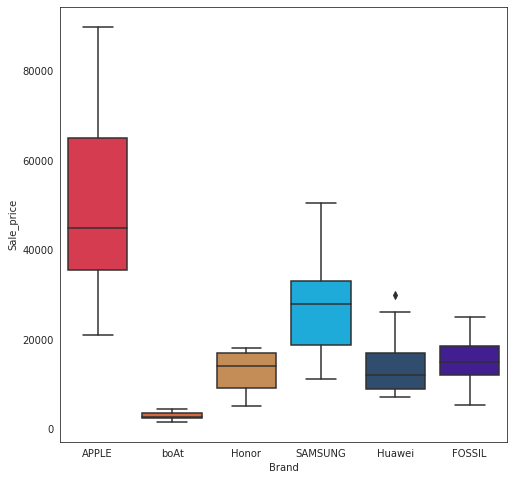

In [76]:
#Box plot to denote average selling prices
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.boxplot(x="Brand", y="Sale_price", data=df_f1,palette=colors)

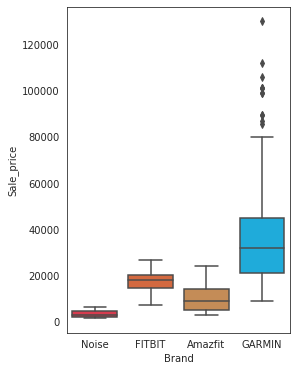

In [56]:
#Box plot to denote average selling prices
fig, ax = plt.subplots(figsize=(4,6))
ax = sns.boxplot(x="Brand", y="Sale_price", data=df_f2,palette=colors)

### No_of_ratings

In [80]:
rating=df.groupby('Brand')['No_of_ratings'].mean().reset_index()
rating

,Brand,No_of_ratings
0,APPLE,3374.492481
1,Amazfit,1008.425532
2,FITBIT,1080.411765
3,FOSSIL,517.944444
4,GARMIN,9.859649
5,Honor,5215.538462
6,Huawei,725.380952
7,Noise,34504.218750
8,SAMSUNG,4467.050847
9,boAt,98713.078125


[Text(0, 0, '3374.49'),
 Text(0, 0, '34504.2'),
 Text(0, 0, '98713.1'),
 Text(0, 0, '5215.54'),
 Text(0, 0, '4467.05'),
 Text(0, 0, '1080.41'),
 Text(0, 0, '1008.43'),
 Text(0, 0, '9.85965'),
 Text(0, 0, '725.381'),
 Text(0, 0, '517.944')]

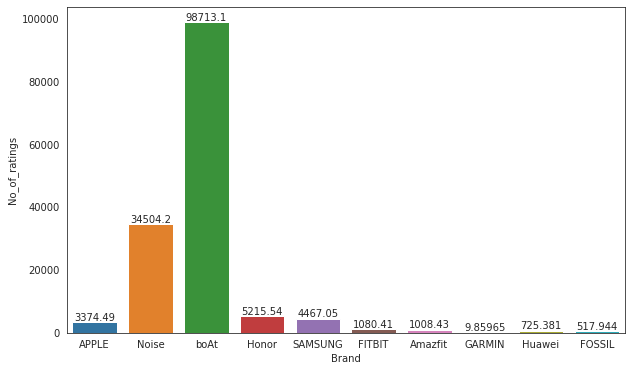

In [87]:
plt.figure(figsize=(10,6))
a=sns.barplot(x=df.Brand,y=df.No_of_ratings,errorbar=None)
a.bar_label(a.containers[0])

### No_of_ reviews

In [82]:
review=df.groupby('Brand')['No_of_reviews'].mean().reset_index()
review

,Brand,No_of_reviews
0,APPLE,292.060150
1,Amazfit,96.978723
2,FITBIT,105.686275
3,FOSSIL,54.675926
4,GARMIN,1.228070
5,Honor,748.384615
6,Huawei,114.666667
7,Noise,3563.062500
8,SAMSUNG,437.542373
9,boAt,8781.171875


[Text(0, 0, '292.06'),
 Text(0, 0, '3563.06'),
 Text(0, 0, '8781.17'),
 Text(0, 0, '748.385'),
 Text(0, 0, '437.542'),
 Text(0, 0, '105.686'),
 Text(0, 0, '96.9787'),
 Text(0, 0, '1.22807'),
 Text(0, 0, '114.667'),
 Text(0, 0, '54.6759')]

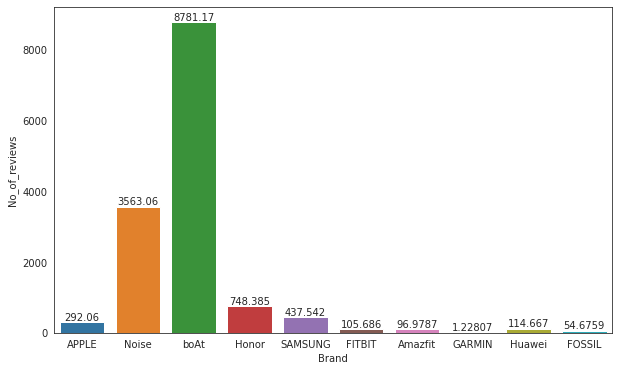

In [88]:
plt.figure(figsize=(10,6))
a=sns.barplot(x=df.Brand,y=df.No_of_reviews,errorbar=None)
a.bar_label(a.containers[0])